# Working with existing deployments

In [1]:
from skil import Skil, Service
from skil import get_workspace_by_id
from skil import get_experiment_by_id
from skil import get_model_by_id
from skil import get_deployment_by_id

skil_server = Skil(
    host='localhost',
    port=9008,
    user_id='your_user_id',
    password='your_password'
)

Using TensorFlow backend.


'>>> Authenticating SKIL...'
'>>> Done!'


In [2]:
workspace_id  = 'your_workspace_id'
experiment_id = 'your_experiment_id'
model_id      = 'your_model_id'
deployment_id = 'your_deployment_id'

In [4]:
work_space = get_workspace_by_id(skil_server, workspace_id)

experiment = get_experiment_by_id(work_space, experiment_id)

deployment = get_deployment_by_id(skil_server, deployment_id)

model      = get_model_by_id(experiment, model_id)

In [5]:
service = Service(
    skil=skil_server,
    model=model,
    deployment=deployment,
    model_deployment=None
)

## Prediction

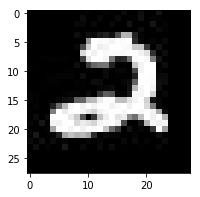

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("mnist.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(3,3))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
image = np.squeeze(image.reshape(1,-1))
image.shape

(784,)

In [8]:
predicted = service.predict_single(image)
print('Predicted:',predicted)
print('Target Class:',np.argmax(predicted))

Predicted: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Target Class: 2
